In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("CooperUnion/cardataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cardataset


In [34]:
!cp -r /root/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1 /content/

In [35]:
import pandas as pd
df = pd.read_csv("/content/1/data.csv")

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [38]:
df.shape

(11914, 16)

In [39]:
df.drop(columns=["Market Category","Model","Popularity"], inplace=True)

In [40]:
df["Fuel_Efficiency"] = (df["city mpg"]+df['highway MPG'])/2

In [41]:
df.duplicated().sum()

np.int64(729)

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.isna().sum()

,0
Make,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Vehicle Size,0
Vehicle Style,0


In [44]:
df.dropna(inplace=True)

In [45]:
df.shape

(11083, 14)

In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
cat_val = df['Make'].value_counts()
cat_less_100 = cat_val[cat_val < 100]
df['Make'] = df['Make'].replace(cat_less_100.index, 'Others')
display(df['Make'].value_counts())

,count
Make,
Chevrolet,1075
Ford,811
Toyota,713
Others,640
Volkswagen,564
Nissan,541
Dodge,522
GMC,482
Honda,431


In [48]:
def extract_auto(s):
    return 1 if "AUTOMATIC" in s else 0

In [49]:
df["Automatic"] = df['Transmission Type'].apply(extract_auto)

In [50]:
df['Automatic'].value_counts()

,count
Automatic,
1,7890
0,3193


In [51]:
# corr = df.corr()

In [52]:
# import seaborn as sns
# from matplotlib import pyplot as plt

In [53]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=2, annot=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11083 entries, 0 to 11082
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11083 non-null  object 
 1   Year               11083 non-null  int64  
 2   Engine Fuel Type   11083 non-null  object 
 3   Engine HP          11083 non-null  float64
 4   Engine Cylinders   11083 non-null  float64
 5   Transmission Type  11083 non-null  object 
 6   Driven_Wheels      11083 non-null  object 
 7   Number of Doors    11083 non-null  float64
 8   Vehicle Size       11083 non-null  object 
 9   Vehicle Style      11083 non-null  object 
 10  highway MPG        11083 non-null  int64  
 11  city mpg           11083 non-null  int64  
 12  MSRP               11083 non-null  int64  
 13  Fuel_Efficiency    11083 non-null  float64
 14  Automatic          11083 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.3+ MB


In [55]:
cat_feature = df.select_dtypes(include='object').columns
cat_feature

Index(['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels',
       'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
oh_tranformer = OneHotEncoder()
oh_tranformer.fit(df[cat_feature])

OneHotEncoder()

In [58]:
classes = oh_tranformer.get_feature_names_out(cat_feature)
df_onehot = pd.DataFrame(oh_tranformer.transform(df[cat_feature]).toarray(), columns=classes)

In [59]:
df = pd.concat([df.drop(columns=cat_feature), df_onehot], axis=1)
display(df.head())

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,Fuel_Efficiency,Automatic,Make_Acura,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,46135,22.5,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,300.0,6.0,2.0,28,19,40650,23.5,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011,300.0,6.0,2.0,28,20,36350,24.0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,230.0,6.0,2.0,28,18,29450,23.0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,230.0,6.0,2.0,28,18,34500,23.0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df.shape

(11083, 77)

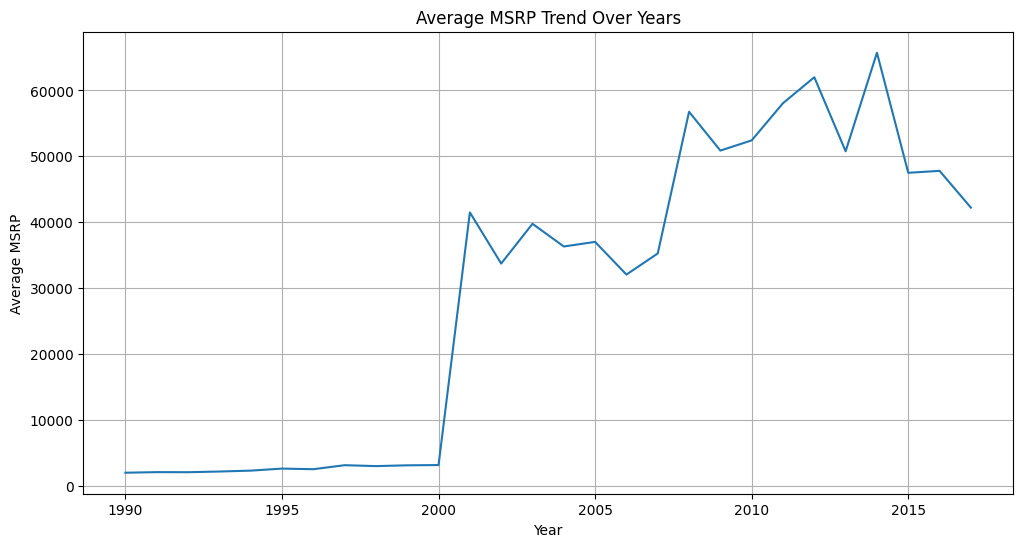

In [63]:
price_trend = df.groupby('Year')['MSRP'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='MSRP', data=price_trend)
plt.title('Average MSRP Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average MSRP')
plt.grid(True)
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = df.drop(columns=['MSRP'])
Y = df['MSRP']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((9974, 76), (9974,), (1109, 76), (1109,))

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11083 entries, 0 to 11082
Data columns (total 76 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           11083 non-null  int64  
 1   Engine HP                                                      11083 non-null  float64
 2   Engine Cylinders                                               11083 non-null  float64
 3   Number of Doors                                                11083 non-null  float64
 4   highway MPG                                                    11083 non-null  int64  
 5   city mpg                                                       11083 non-null  int64  
 6   Fuel_Efficiency                                                11083 non-null  float64
 7   Automatic                                                 

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
num_feature = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'Fuel_Efficiency']

In [71]:
scaler = StandardScaler()
scaler.fit(X_train[num_feature])

StandardScaler()

In [72]:
X_train[num_feature] = scaler.transform(X_train[num_feature])
X_test[num_feature] = scaler.transform(X_test[num_feature])

In [73]:
X_train.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Fuel_Efficiency,Automatic,Make_Acura,Make_Audi,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
count,9.974000e+03,9.974000e+03,9.974000e+03,9.974000e+03,9.974000e+03,9974.000000,9.974000e+03,9974.000000,9974.000000,9974.000000,...,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,1.540875e-14,-6.696513e-17,-4.488088e-17,1.214633e-16,-2.272540e-16,19.314718,2.172805e-17,0.713455,0.021957,0.029577,...,0.065069,0.002607,0.103168,0.058452,0.053940,0.035693,0.010427,0.030981,0.253258,0.051033
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,6.629765,1.000050e+00,0.452170,0.146551,0.169425,...,0.246660,0.050993,0.304194,0.234608,0.225911,0.185532,0.101585,0.173274,0.434900,0.220075
min,-2.849219e+00,-1.801247e+00,-3.224054e+00,-1.670683e+00,-1.885918e+00,7.000000,-1.954397e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.054460e-01,-7.440314e-01,-9.539013e-01,-1.670683e+00,-5.651756e-01,16.000000,-6.315715e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.975061e-01,-1.425123e-01,1.811752e-01,6.240760e-01,-1.689528e-01,18.000000,-1.171394e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.353751e-01,4.498930e-01,1.811752e-01,6.240760e-01,4.914185e-01,22.000000,4.707829e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,8.732441e-01,6.820528e+00,5.856558e+00,6.240760e-01,4.328348e+01,137.000000,2.442862e+01,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [76]:
def evaluate_model(true, predicted):
  mae = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mean_squared_error(true, predicted))
  r2_square = r2_score(true, predicted)
  return mae, mse, rmse, r2_square

In [80]:
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),

}

for name, model in models.items():
  model.fit(X_train, Y_train)

  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

  model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(Y_train, train_predict)
  model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(Y_test, test_predict)

  print(name)

  print("Model performance for training set")
  print("-Root mean Squared Error : {:.4f}".format(model_train_rmse))
  print("-Mean Absolute Error : {:.4f}".format(model_train_mae))
  print("-Mean Squared Error : {:.4f}".format(model_train_mse))
  print("-R2 Score : {:.4f}".format(model_train_r2))

  print("----------------------------------")

  print("Model performance for test set")
  print("-Root mean Squared Error : {:.4f}".format(model_test_rmse))
  print("-Mean Absolute Error : {:.4f}".format(model_test_mae))
  print("-Mean Squared Error : {:.4f}".format(model_test_mse))
  print("-R2 Score : {:.4f}".format(model_test_r2))
  print("="*35)
  print("\n")

Linear Regression
Model performance for training set
-Root mean Squared Error : 38715.1293
-Mean Absolute Error : 16959.4233
-Mean Squared Error : 1498861239.9718
-R2 Score : 0.6022
----------------------------------
Model performance for test set
-Root mean Squared Error : 43668.9427
-Mean Absolute Error : 18202.1865
-Mean Squared Error : 1906976558.9219
-R2 Score : 0.5483


Support Vector Machine
Model performance for training set
-Root mean Squared Error : 62292.8071
-Mean Absolute Error : 23349.8209
-Mean Squared Error : 3880393818.5390
-R2 Score : -0.0300
----------------------------------
Model performance for test set
-Root mean Squared Error : 66385.4550
-Mean Absolute Error : 25218.8154
-Mean Squared Error : 4407028631.0500
-R2 Score : -0.0439


Decision Tree
Model performance for training set
-Root mean Squared Error : 5013.2074
-Mean Absolute Error : 1516.6689
-Mean Squared Error : 25132248.0451
-R2 Score : 0.9933
----------------------------------
Model performance for test

In [90]:
# Grad_param = {
#     "loss": ['squared_error', 'absolute_error', 'huber'],
#     "learning_rate": [0.01, 0.05, 0.1],
#     "n_estimators": [100, 500, 1000],
#     "criterion": ['friedman_mse', 'mse', 'mae'],
#     "max_depth": [3, 8, 15, None],
# }

# rnd_f_param = {
#     "max_depth": [3, 8, 15, None],
#     "n_estimators": [100, 500, 1000],
#     "criterion": ['squared_error', 'absolute_error', 'poisson'],
#     "max_features": ['sqrt', 'log2', None],
#     "min_samples_split": [2, 4],
# }

XGB_param = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 500, 1000],
    "max_depth": [3, 8, 15, None],
    "subsample": [0.5, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.8, 1.0],
}

In [91]:
Randomcv_model = [#("RF", RandomForestRegressor(), rnd_f_param),
                  #("GB", GradientBoostingRegressor(), Grad_param),
                  ("XGB", XGBRegressor(), XGB_param), ]


In [93]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, param in Randomcv_model:
  random = RandomizedSearchCV(estimator=model,
                                  param_distributions=param,
                                  cv=3,#5
                                  scoring = ['r2', 'neg_mean_squared_error'],
                                  refit = 'r2',
                                  n_iter=50,#100
                                  verbose=2,
                                  random_state=42,
                                  n_jobs=-1)
  random.fit(X_train, Y_train)
  model_param[name] = random.best_params_

for model_name in model_param:
  print(f"-------Best parameter for {model_name}-------")
  print(model_param[model_name])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
-------Best parameter for XGB-------
{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': None, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [98]:
models = {
#     "Gradient Boosting": GradientBoostingRegressor(learning_rate=0.01,
#                                                    n_estimators=100,
#                                                    # max_features='auto', # 'auto' is deprecated
#                                                    subsample=0.5,
#                                                    random_state=1,
#                                                    criterion = 'friedman_mse',
#                                                    max_depth = 3,
#                                                    loss= 'squared_error'

# ),
           "Xgb boost": XGBRegressor(learning_rate=0.01,
                                                    n_estimators=1000,
                                                    max_depth=None,
                                                    colsample_bytree=1.0,
                                                    random_state=42,
                                                    subsample = 0.5,),

}

for name, model in models.items():
  model.fit(X_train, Y_train)

  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

  model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(Y_train, train_predict)
  model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(Y_test, test_predict)

  print(name)

  print("Model performance for training set")
  print("-Root mean Squared Error : {:.4f}".format(model_train_rmse))
  print("-Mean Absolute Error : {:.4f}".format(model_train_mae))
  print("-Mean Squared Error : {:.4f}".format(model_train_mse))
  print("-R2 Score : {:.4f}".format(model_train_r2))

  print("----------------------------------")

  print("Model performance for test set")
  print("-Root mean Squared Error : {:.4f}".format(model_test_rmse))
  print("-Mean Absolute Error : {:.4f}".format(model_test_mae))
  print("-Mean Squared Error : {:.4f}".format(model_test_mse))
  print("-R2 Score : {:.4f}".format(model_test_r2))
  print("="*35)
  print("\n")

Xgb boost
Model performance for training set
-Root mean Squared Error : 7556.9475
-Mean Absolute Error : 3765.3555
-Mean Squared Error : 57107456.0000
-R2 Score : 0.9848
----------------------------------
Model performance for test set
-Root mean Squared Error : 13819.5473
-Mean Absolute Error : 4781.9321
-Mean Squared Error : 190979888.0000
-R2 Score : 0.9548




In [99]:
import joblib

In [100]:
df.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,Fuel_Efficiency,Automatic,Make_Acura,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,46135,22.5,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,300.0,6.0,2.0,28,19,40650,23.5,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011,300.0,6.0,2.0,28,20,36350,24.0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,230.0,6.0,2.0,28,18,29450,23.0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,230.0,6.0,2.0,28,18,34500,23.0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
model_dict = {"model": model,
              "onehot_encoder": oh_tranformer,
              "scaler": scaler}

In [103]:
joblib.dump(model_dict, "car_price_prediction.joblib")

['car_price_prediction.joblib']

In [104]:
from re import T
load_model = joblib.load("car_price_prediction.joblib")
model = load_model["model"]
oh_tranformer = load_model["onehot_encoder"]
scaler = load_model["scaler"]

In [105]:
df.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,Fuel_Efficiency,Automatic,Make_Acura,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,46135,22.5,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,300.0,6.0,2.0,28,19,40650,23.5,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011,300.0,6.0,2.0,28,20,36350,24.0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,230.0,6.0,2.0,28,18,29450,23.0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,230.0,6.0,2.0,28,18,34500,23.0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# .classes_

In [131]:
Make = "BMW"
Year = 2011
Engine_Fuel_Type = "premium unleaded (required)"
Engine_HP       = 300.0
Engine_Cylinders =      6.0
Transmission_Type       = "MANUAL"
Driven_Wheels   = "rear wheel drive"
Number_of_Doors = 2.0
Vehicle_Size    = "Compact"
Vehicle_Style   = "Convertible"
highway_MPG     = 28
city_mpg        = 19
Fuel_Efficiency = 23.5
Automatic = 0

In [132]:
user_input = [[Make ,Year ,Engine_Fuel_Type ,Engine_HP ,Engine_Cylinders ,Transmission_Type ,Driven_Wheels ,Number_of_Doors ,Vehicle_Size ,Vehicle_Style ,highway_MPG ,city_mpg ,Fuel_Efficiency ,Automatic]]

input_df = pd.DataFrame(user_input, columns=["Make", "Year", "Engine Fuel Type", "Engine HP", "Engine Cylinders", "Transmission Type", "Driven_Wheels", "Number of Doors", "Vehicle Size", "Vehicle Style", "highway MPG", "city mpg", "Fuel_Efficiency", "Automatic"])

input_df

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Fuel_Efficiency,Automatic
0,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,23.5,0


In [135]:
cat_feature = input_df.select_dtypes(include='object').columns
print(cat_feature)

Index(['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels',
       'Vehicle Size', 'Vehicle Style'],
      dtype='object')


In [136]:


classes = oh_tranformer.get_feature_names_out(cat_feature)
df_onehot = pd.DataFrame(oh_tranformer.transform(input_df[cat_feature]).toarray(), columns=classes)
input_df = pd.concat([input_df.drop(columns=cat_feature), df_onehot], axis=1)
input_df
# num_feature = df.select_dtypes(exclude='object').columns
# print(num_feature)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Fuel_Efficiency,Automatic,Make_Acura,Make_Audi,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,300.0,6.0,2.0,28,19,23.5,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
num_feature = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'Fuel_Efficiency']

In [138]:
input_df[num_feature] = scaler.transform(input_df[num_feature])

In [139]:
input_df

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Fuel_Efficiency,Automatic,Make_Acura,Make_Audi,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,0.04603,0.431665,0.181175,-1.670683,0.22727,19,0.103331,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
pred = model.predict(input_df)

In [141]:
pred

array([49781.566], dtype=float32)